In [ ]:
#@title
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

def show_features_student(student_index):
    df_student = df_1.iloc[student_index, 3:].to_frame()
    df_student.rename({student_index:'exam_1'}, inplace=True, axis=1)
    df_student['exam_2'] = df_2.iloc[student_index, 3:].values
    df_student['exam_3'] = df_3.iloc[student_index, 3:].values
    df_student['exam_4'] = df_4.iloc[student_index, 3:].values
    df_student['exam_5'] = df_5.iloc[student_index, 3:].values
    df_student['exam_6'] = df_6.iloc[student_index, 3:].values
    return df_student

def plot_features(df_student):
    fig, axs = plt.subplots(3, 5, constrained_layout=True, figsize=(20, 10))
    row = 0
    for i in range(3):
        for j in range(5):
            axs[i,j].plot(df_student.iloc[row])
            axs[i,j].set_title(df_student.iloc[row].name)
            row += 1

#!unzip -q '/content/drive/Shared drives/iniciacao_cientifica_2019_2020/codebench.zip'

In [ ]:
#@title
df_rf1 = pd.read_excel(io='/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_experimento/train_with_D.xlsx', sheet_name='random_forest')
df_etc1 = pd.read_excel(io='/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_experimento/train_with_D.xlsx', sheet_name='extra_tree_classifier')
df_xgb1 = pd.read_excel(io='/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_experimento/train_with_D.xlsx', sheet_name='xgboost')
df_gnb1 = pd.read_excel(io='/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_experimento/train_with_D.xlsx', sheet_name='gaussian_naive_bayes')

df_rf1.rename({'Unnamed: 0':'student'}, inplace=True, axis=1)
df_etc1.rename({'Unnamed: 0':'student'}, inplace=True, axis=1)
df_xgb1.rename({'Unnamed: 0':'student'}, inplace=True, axis=1)
df_gnb1.rename({'Unnamed: 0':'student'}, inplace=True, axis=1)

df_rf2 = pd.read_excel('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_experimento/train_no_D.xlsx', sheet_name='random_forest')
df_etc2 = pd.read_excel('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_experimento/train_no_D.xlsx', sheet_name='extra_tree_classifier')
df_xgb2 = pd.read_excel('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_experimento/train_no_D.xlsx', sheet_name='xgboost')
df_gnb2 = pd.read_excel('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_experimento/train_no_D.xlsx', sheet_name='gaussian_naive_bayes')

df_rf2.rename({'Unnamed: 0':'student'}, inplace=True, axis=1)
df_etc2.rename({'Unnamed: 0':'student'}, inplace=True, axis=1)
df_xgb2.rename({'Unnamed: 0':'student'}, inplace=True, axis=1)
df_gnb2.rename({'Unnamed: 0':'student'}, inplace=True, axis=1)

df_1 = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_treino/turma_102_2016_1/Dataframe1_Turma_102_2016_06_07_12_00_00_2016_06_30_11_55_00.csv', sep=';')
df_2 = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_treino/turma_102_2016_1/Dataframe2_Turma_102_2016_06_07_12_00_00_2016_07_19_13_20_00.csv', sep=';')
df_3 = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_treino/turma_102_2016_1/Dataframe3_Turma_102_2016_06_07_12_00_00_2016_07_28_12_00_00.csv', sep=';')
df_4 = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_treino/turma_102_2016_1/Dataframe4_Turma_102_2016_06_07_12_00_00_2016_08_11_11_55_00.csv', sep=';')
df_5 = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_treino/turma_102_2016_1/Dataframe5_Turma_102_2016_06_07_12_00_00_2016_08_25_11_55_00.csv', sep=';')
df_6 = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_treino/turma_102_2016_1/Dataframe6_Turma_102_2016_06_07_12_00_00_2016_09_13_12_45_00.csv', sep=';')

df_user_target = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/csv_datasets/usuarios_classificados.csv')

df_valid_assessment = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/csv_datasets/avaliacoes_validas.csv', sep=';')

# Analises de alunos nos experimentos

**Experimento 1:** O primeiro experimento consistiu em treinar o modelo com todos os alunos da turma 102 do semestre 2016-1, cada treinamento foi feito com 6 conjuntos de dados, cada conjunto consiste de dados acumulados do inicio até a cada uma das provas. 

**Experimento 2:** O experimento dois usou a mesma turma com os mesmos dados, com uma pequena modificação, toda vez que um aluno era classificado como **Desistente** era retirado do conjunto e no próximo treinamento ele não fazia mais parte do conjunto

- Foram usados 4 técnicas de Aprendizado de Máquina: Random Forest, Extra Tree Classifier, XGBoost e Gaussian Naive Bayes

Segue abaixo o resultado da classificação das técnicas empregadas.  
  

## Predições com dados acumulados até as respectivas avaliações

# Random forest predições **experimento 1**

In [ ]:
#@title
df_rf

,student,classe,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
0,0,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
1,1,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
2,2,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
3,3,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
4,4,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
5,5,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
6,6,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
7,7,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
8,8,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
9,9,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente


## Random Forest predições **Experimento 2**

In [ ]:
#@title
df_rf2

,student,target,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
0,0,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
1,1,Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
2,2,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
3,3,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
4,4,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
5,5,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
6,6,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
7,7,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
8,8,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
9,9,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente


## Extra Tree Classifier predições **Experimento 1**

In [ ]:
#@title
df_etc1

,student,classe,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
0,0,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
1,1,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
2,2,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
3,3,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
4,4,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
5,5,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
6,6,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
7,7,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
8,8,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
9,9,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente


## Extra Tree Classifier **Experimento 2**

In [ ]:
#@title
df_etc2

,student,target,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
0,0,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
1,1,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
2,2,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
3,3,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
4,4,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
5,5,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
6,6,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
7,7,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
8,8,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
9,9,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente


## XGBoost **experimento 1**

In [ ]:
#@title
df_xgb1

,student,classe,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
0,0,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
1,1,Desistente,Desistente,Desistente,Desistente,Não Desistente,Não Desistente,Desistente
2,2,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
3,3,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
4,4,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
5,5,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
6,6,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
7,7,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
8,8,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
9,9,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente


## XGBoost **experimento 2**

In [ ]:
#@title
df_xgb2

,student,target,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
0,0,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
1,1,Desistente,Não Desistente,Não Desistente,Não Desistente,Desistente,NaN,NaN
2,2,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
3,3,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
4,4,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
5,5,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
6,6,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Desistente,NaN,NaN
7,7,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
8,8,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
9,9,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente


## Gaussian Naive Bayes **experimento 1**

In [ ]:
#@title
df_gnb1

,student,classe,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
0,0,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
1,1,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
2,2,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
3,3,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
4,4,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente,Desistente
5,5,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
6,6,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
7,7,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
8,8,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
9,9,Não Desistente,Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente


## Gaussian Naive Bayes **experimento 2**

In [ ]:
#@title
df_gnb2

,student,target,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
0,0,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
1,1,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
2,2,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
3,3,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
4,4,Desistente,Desistente,NaN,NaN,NaN,NaN,NaN
5,5,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
6,6,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
7,7,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
8,8,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente,Não Desistente
9,9,Não Desistente,Desistente,NaN,NaN,NaN,NaN,NaN


## Analisando os alunos com comportamentos extranhos nos experimentos

## Analisando o **aluno 9**

In [ ]:
#@title
student_9 = show_features_student(9)
student_9

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,28,57,73,101,128,155
average_active_time,169.225,314.425,481.788,615.3,761.525,975.438
average_exam_sub_comp,1.417,1.667,2.083,2.583,2.917,3.167
average_exam_sub_inc,0,0.417,0.417,0.583,0.75,0.833
average_exam_sub_err,0.333,0.583,0.583,0.583,0.667,0.667
average_exam_test,1.083,1.667,3.583,4.333,5.917,6.5
average_exam_test_err,0.25,0.333,0.333,0.417,0.5,0.583
average_exam_code_line,319.583,319.583,319.583,319.583,319.583,319.583
average_exam_sub_average_interval,31.776,45.387,113.596,176.492,282.117,296.45
average_homework_sub_comp,0.397,0.647,0.897,1.103,1.471,2.015


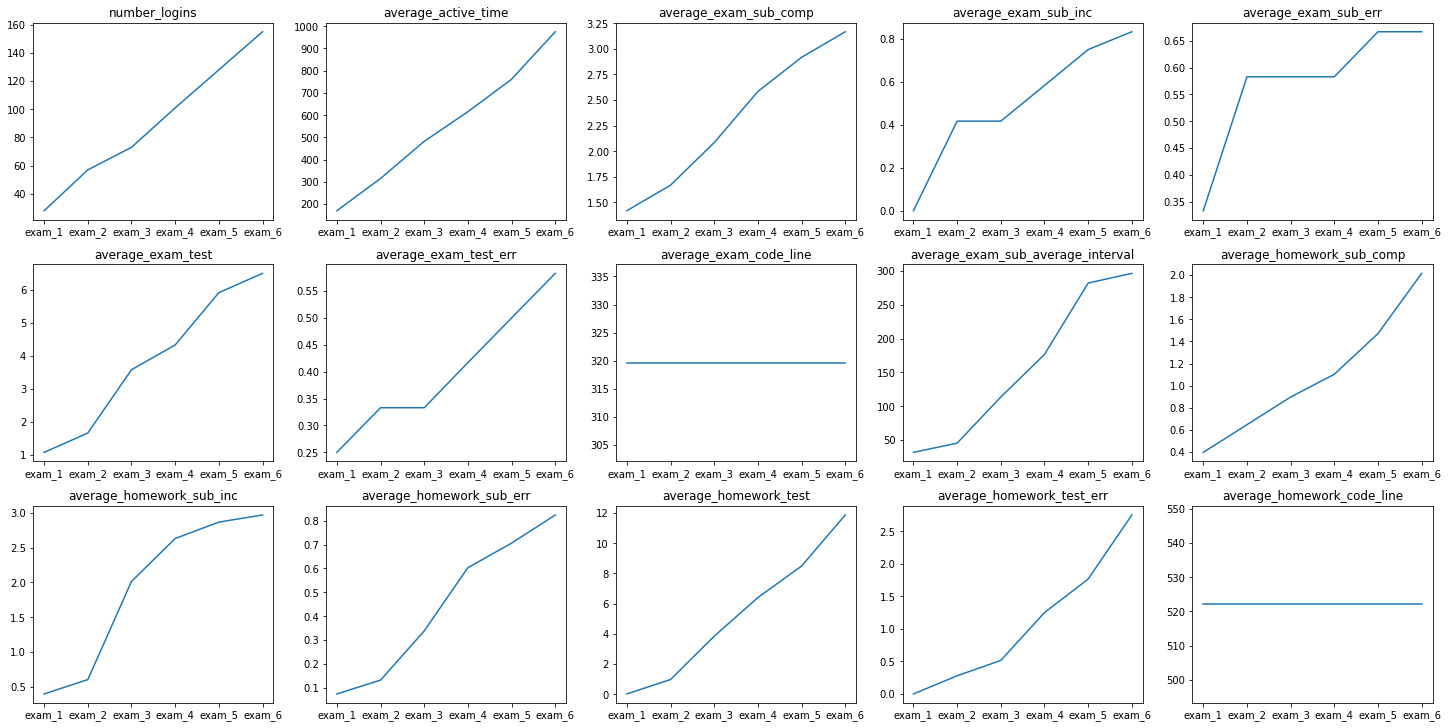

In [ ]:
#@title
plot_features(student_9)

- Apresenta um comportamento normal, no sentido de está acumular as features de acordo com o caminhar das provas entretando no experimento 1 com Modelo Gaussian Naive Bayes e dados até a primeira prova apresenta uma anomalia, por isso está sendo verificado.

- Talvez a explicação da predição errada seja porque até a primeira prova algumas features desse aluno estavam zeradas como por exemplo **average_exam_sub_inc**, **average_homework_test_err** e **average_homework_test_average**, mas depois da 1º prova começaram a ser acumuladas.

## Analisando o **aluno 15**

In [ ]:
#@title
student_15 = show_features_student(15)
student_15

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,24,42,54,69,83,102
average_active_time,272.275,458.363,540.763,659.425,761.138,827.675
average_exam_sub_comp,0.25,0.5,0.583,0.833,0.917,0.917
average_exam_sub_inc,0.583,1.167,1.167,1.25,1.25,1.25
average_exam_sub_err,0.167,1.167,1.25,1.25,1.667,1.75
average_exam_test,1.583,5.5,5.833,6.667,7.583,8.583
average_exam_test_err,0.25,3.583,3.667,3.917,4.667,5.667
average_exam_code_line,423.417,423.417,423.417,423.417,423.417,423.417
average_exam_sub_average_interval,135.369,157.212,157.212,2514.05,6091.21,6091.21
average_homework_sub_comp,0.324,0.456,0.779,0.985,1.132,1.324


In [ ]:
#@title
df_1.iloc[:, 3:].describe()

,number_logins,average_active_time,average_exam_sub_comp,average_exam_sub_inc,average_exam_sub_err,average_exam_test,average_exam_test_err,average_exam_code_line,average_exam_sub_average_interval,average_homework_sub_comp,average_homework_sub_inc,average_homework_sub_err,average_homework_test,average_homework_test_err,average_homework_code_line,average_homework_test_average
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,16.018868,295.512151,0.181736,1.419849,0.544132,3.698377,1.388038,670.769547,17.880830,0.478509,0.624472,0.446887,0.905717,0.488962,383.022377,67.899755
std,7.336659,234.058475,0.231867,1.791882,0.960794,4.460682,2.116829,464.799413,36.181234,0.415616,0.642547,0.654778,1.664950,0.898316,263.570407,201.884560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,174.973000,0.083000,0.000000,0.083000,1.083000,0.250000,347.000000,2.359000,0.294000,0.221000,0.095000,0.000000,0.000000,174.048000,0.000000
50%,16.000000,233.713000,0.167000,0.917000,0.333000,2.455000,0.583000,635.500000,7.804000,0.349000,0.417000,0.279000,0.221000,0.118000,336.794000,2.356000
75%,21.000000,299.563000,0.200000,2.333000,0.636000,3.818000,1.500000,1029.200000,17.067000,0.550000,0.794000,0.515000,0.857000,0.463000,619.132000,12.321000
max,33.000000,1136.500000,1.417000,7.000000,6.600000,20.167000,10.600000,1582.091000,221.000000,2.456000,3.544000,3.977000,8.000000,3.523000,1138.591000,965.598000


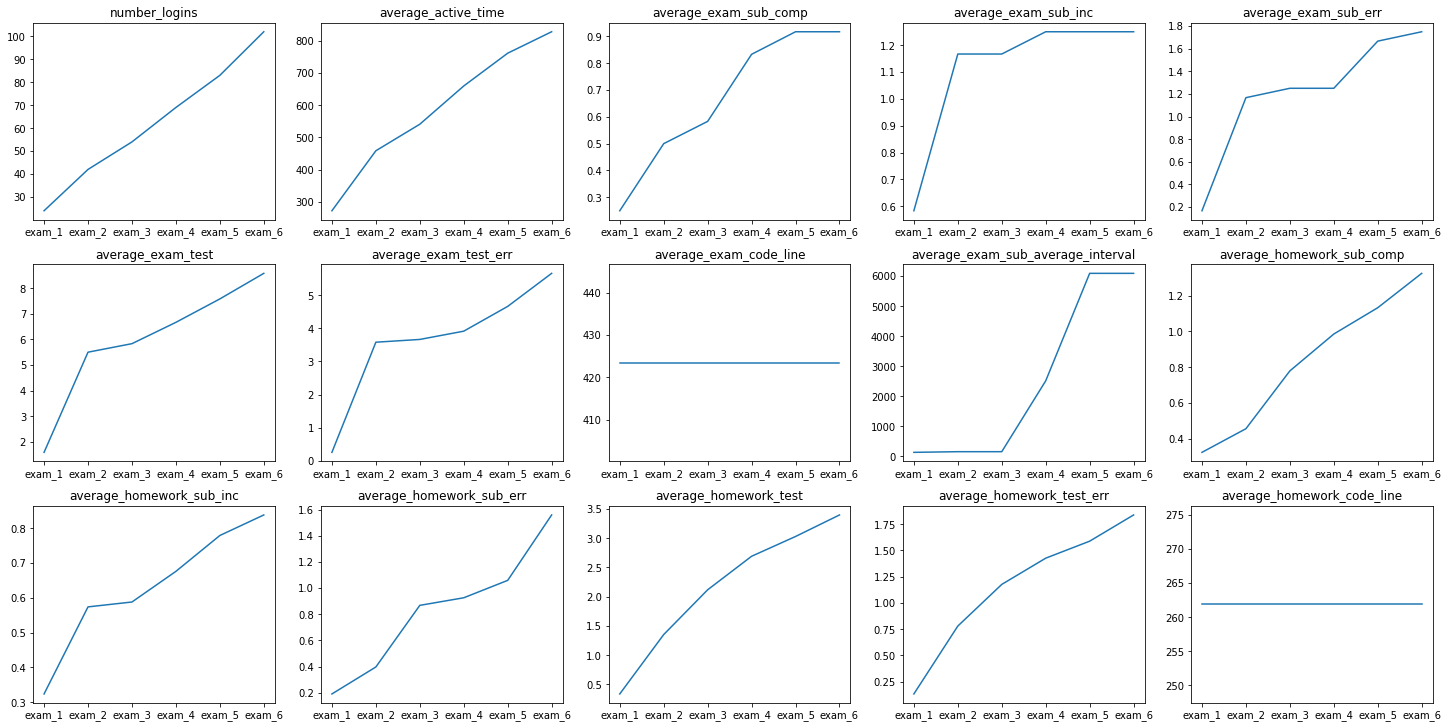

In [ ]:
#@title
plot_features(student_15)

- Esse aluno apresenta comportamento comum, os valores das suas features até a primeira prova estão em torno da média da turma, **não se consegue verificar** um comportamento extranho nele, contudo é um **Falso positivo** quando se usa Gaussian Naive bayes para classificá-lo.

## Analisando o **aluno 23**

### Dados do aluno 23 agrupados

In [ ]:
#@title
df_student_23 = show_features_student(23)
df_student_23

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,7,14,17,20,22,24
average_active_time,410.839,702.258,820.774,842.645,859.387,883.419
average_exam_sub_comp,0.091,0.273,0.273,0.273,0.273,0.273
average_exam_sub_inc,0.091,0.273,0.273,0.273,0.273,0.273
average_exam_sub_err,0.455,0.455,0.455,0.455,0.455,0.455
average_exam_test,1.818,2.636,3.545,3.636,3.636,3.636
average_exam_test_err,1.091,1.364,2.273,2.364,2.364,2.364
average_exam_code_line,101.182,101.182,101.182,101.182,101.182,101.182
average_exam_sub_average_interval,30.795,58.432,58.432,58.432,58.432,58.432
average_homework_sub_comp,0.55,0.6,0.75,0.75,0.75,0.75


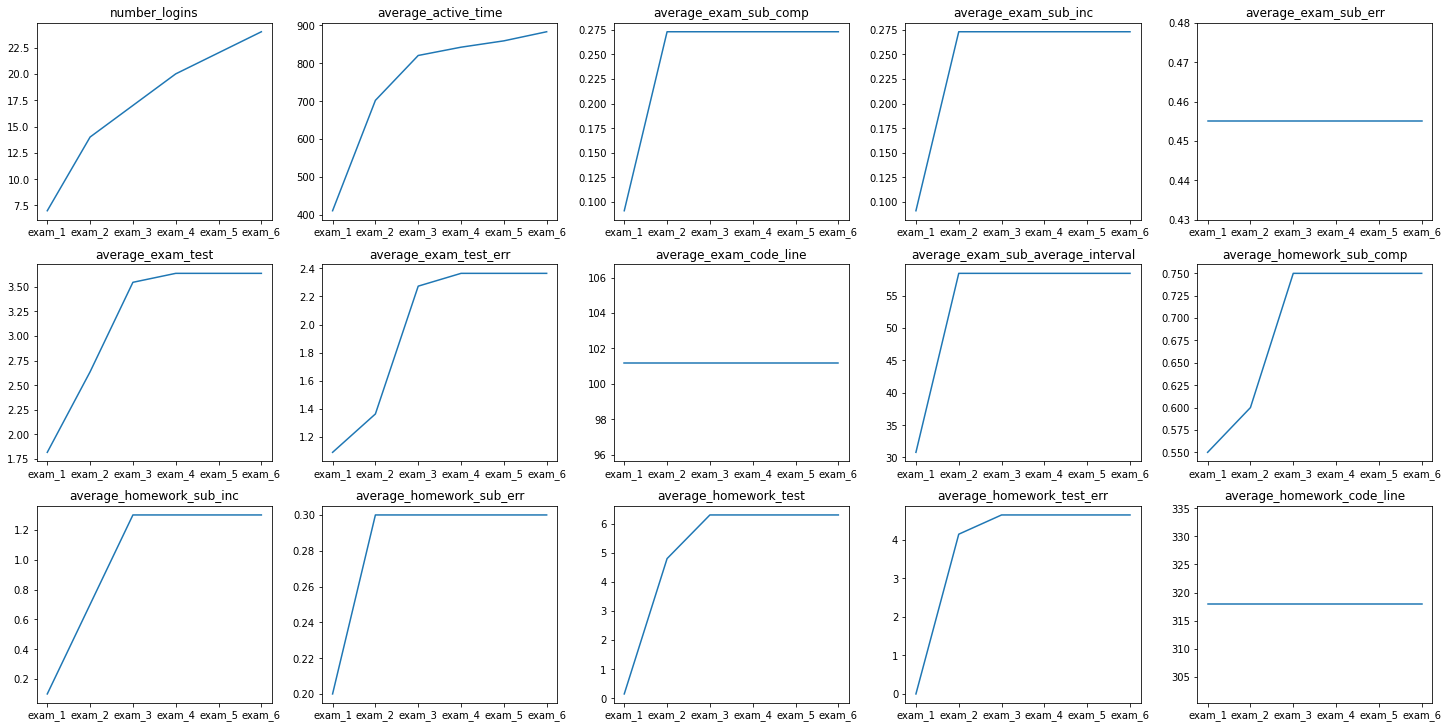

In [ ]:
#@title
plot_features(df_student_23)

- Um ponto que se destaca no aluno 23 é que a partir da 3 prova ele não fez mais nenhuma avaliação válida, **mas continuava a fazer login**, será que por isso ele foi classificado como **Desistente** quando o modelo foi treinado com os dados de usuários até a 5º avaliação?

- Ele não faz avaliações válidas talvez ainda continue fazendo avaliações não válidas como o **Lab 0**.

- Ao comparar os valores das features do usuário 23 com os dados da turma até 6º prova é possível notar uma grande diferença.

- Será que o usuário 23 continuou nas aulas e foi um aluno repovado por nota? já que ele não tem registros de ter feito mais nenhuma questão das avaliações e por isso ele não é classificado como **Desistente**?

- Visualizando a nota final de desse aluno.

In [ ]:
!cat /content/codebench/2016-1/102/users/1302/grades/final_grade.data

1.14

- Como a nota final de foi 1.14 de média é provável que este aluno tenha sido reprovado por nota.

106
126
136
149
173
199
217
44
75
97

In [ ]:
!ls /content/codebench/2016-1/102/users/1302/executions

106_1079.log  136_1135.log  18_797.log	  44_1015.log  75_1054.log
106_1099.log  149_1154.log  18_994.log	  44_587.log   75_1055.log
106_1100.log  149_1169.log  18_996.log	  44_588.log   75_1056.log
126_1109.log  173_1197.log  18_999.log	  44_820.log   75_602.log
126_1149.log  173_1209.log  199_1257.log  44_835.log   75_820.log
136_1132.log  18_1000.log   217_1288.log  59_1023.log  75_869.log
136_1133.log  18_1001.log   217_1305.log  59_1029.log  97_1084.log
136_1134.log  18_578.log    44_1014.log   75_1053.log  97_1094.log


- o aluno 23 fez 10 avalições das 13 válidas (**106, 126, 136, 149, 173, 199, 217, 44, 75, 97**)

## Analisando o **aluno 32**

- O aluno 32 aprensenta comportamento anormal porque ele é classificado com **Desistente**, mas em todos os teste com o modelo Random Forest ele é predito como **Não Desistente**, primeiramente visualiza-se os arquivos dele de interação com a plataforma, mais especificamente os arquivos **logs** de **execução** de códigos, ou seja, **submissão** e **testes**.

In [ ]:
!ls /content/codebench/2016-1/102/users/1311/executions

18_1000.log  18_999.log   44_587.log  44_842.log   75_1055.log	97_1083.log
18_1001.log  44_1014.log  44_588.log  59_1022.log  75_1056.log	97_1098.log
18_797.log   44_1015.log  44_820.log  59_1031.log  75_602.log
18_994.log   44_1016.log  44_825.log  75_1053.log  75_820.log
18_996.log   44_1017.log  44_835.log  75_1054.log  75_869.log


- Ao visualizar os arquivos percebe-se que ele possui arquivos de **sumbissão** dos **homeworks** válidos: **44, 75** e do **teste** válido: **97**, das **13** Avaliações ele fez apenas **3** por isso é considerado **Desistente**.

- Um ponto a ser destacado é que as **3** avaliações feitas pelo usuário compõem o primeiro conjunto de dados de treino.
    
- Pode ser considerar que depois do primeiro **exam** o aluno desistiu?

- Mesmo feito apenas **3** avaliações porque os modelo em todos os testes considerou ele como **Não Desistente**?

#### Visualizando as notas do aluno nas avaliações

In [ ]:
!cat /content/codebench/2016-1/102/users/1311/grades/44.log

---- grade (0-10): 10
---- number of exercises: 10
---- correct: 10
---- incorrect: 0
---- blank: 0

In [ ]:
!cat /content/codebench/2016-1/102/users/1311/grades/75.log

---- grade (0-10): 10
---- number of exercises: 7
---- correct: 7
---- incorrect: 0
---- blank: 0

In [ ]:
!cat /content/codebench/2016-1/102/users/1311/grades/97.log

---- grade (0-10): 5
---- number of exercises: 2
---- correct: 1
---- incorrect: 1
---- blank: 0

#### Comparando os dados de treinamento do aluno 32 no primeiro conjunto de dados, isto é, até aprimeira prova com os dados de outros alunos

In [ ]:
df_1.iloc[32, 3:]

number_logins                             19
average_active_time                  889.789
average_exam_sub_comp                    0.5
average_exam_sub_inc                       7
average_exam_sub_err                       1
average_exam_test                         12
average_exam_test_err                      8
average_exam_code_line                 560.5
average_exam_sub_average_interval     33.393
average_homework_sub_comp              1.294
average_homework_sub_inc               1.471
average_homework_sub_err               1.059
average_homework_test                  4.118
average_homework_test_err              2.824
average_homework_code_line           165.529
average_homework_test_average        411.599
Name: 32, dtype: object

In [ ]:
df_1.iloc[: , 3:].describe()

,number_logins,average_active_time,average_exam_sub_comp,average_exam_sub_inc,average_exam_sub_err,average_exam_test,average_exam_test_err,average_exam_code_line,average_exam_sub_average_interval,average_homework_sub_comp,average_homework_sub_inc,average_homework_sub_err,average_homework_test,average_homework_test_err,average_homework_code_line,average_homework_test_average
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,16.018868,295.512151,0.181736,1.419849,0.544132,3.698377,1.388038,670.769547,17.880830,0.478509,0.624472,0.446887,0.905717,0.488962,383.022377,67.899755
std,7.336659,234.058475,0.231867,1.791882,0.960794,4.460682,2.116829,464.799413,36.181234,0.415616,0.642547,0.654778,1.664950,0.898316,263.570407,201.884560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,174.973000,0.083000,0.000000,0.083000,1.083000,0.250000,347.000000,2.359000,0.294000,0.221000,0.095000,0.000000,0.000000,174.048000,0.000000
50%,16.000000,233.713000,0.167000,0.917000,0.333000,2.455000,0.583000,635.500000,7.804000,0.349000,0.417000,0.279000,0.221000,0.118000,336.794000,2.356000
75%,21.000000,299.563000,0.200000,2.333000,0.636000,3.818000,1.500000,1029.200000,17.067000,0.550000,0.794000,0.515000,0.857000,0.463000,619.132000,12.321000
max,33.000000,1136.500000,1.417000,7.000000,6.600000,20.167000,10.600000,1582.091000,221.000000,2.456000,3.544000,3.977000,8.000000,3.523000,1138.591000,965.598000


- Os valores dos atributos do aluno 32 até primeria prova estão bem similares aos demais alunos, alguns ficam a cima da média da turma inclusive.

- O aluno era bem ativo até a primeira prova.

- Depois da primeira prova ele não teve mais atividade na plataforma.

- Ele tirou nota máxima no **homework 44** e **75**, na prova 50% no **exam 97**

#### Visualizando os dados do aluno 32 nos demais conjuntos de treinamento

In [ ]:
#@title
df_student_32 = df_1.iloc[32, 3:].to_frame()
df_student_32.rename({32:'exam_1'}, inplace=True, axis=1)
df_student_32['exam_2'] = df_2.iloc[32, 3:].values
df_student_32['exam_3'] = df_3.iloc[32, 3:].values
df_student_32['exam_4'] = df_4.iloc[32, 3:].values
df_student_32['exam_5'] = df_5.iloc[32, 3:].values
df_student_32['exam_6'] = df_6.iloc[32, 3:].values
df_student_32

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,19,19,19,19,20,20
average_active_time,889.789,889.789,889.789,889.789,889.789,889.789
average_exam_sub_comp,0.5,0.5,0.5,0.5,0.5,0.5
average_exam_sub_inc,7,7,7,7,7,7
average_exam_sub_err,1,1,1,1,1,1
average_exam_test,12,12,12,12,12,12
average_exam_test_err,8,8,8,8,8,8
average_exam_code_line,560.5,560.5,560.5,560.5,560.5,560.5
average_exam_sub_average_interval,33.393,33.393,33.393,33.393,33.393,33.393
average_homework_sub_comp,1.294,1.294,1.294,1.294,1.294,1.294


## Analisando o mais detalhadamente o **aluno 33**

In [ ]:
#@title
student_33 = show_features_student(33)
student_33

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,13,15,15,15,15,15
average_active_time,1136.5,1289.55,1289.55,1289.55,1289.55,1289.55
average_exam_sub_comp,0.5,0.5,0.5,0.5,0.5,0.5
average_exam_sub_inc,1,1,1,1,1,1
average_exam_sub_err,0.5,0.5,0.5,0.5,0.5,0.5
average_exam_test,17,17,17,17,17,17
average_exam_test_err,7.5,7.5,7.5,7.5,7.5,7.5
average_exam_code_line,347,347,347,347,347,347
average_exam_sub_average_interval,45,45,45,45,45,45
average_homework_sub_comp,1.278,1.333,1.333,1.333,1.333,1.333


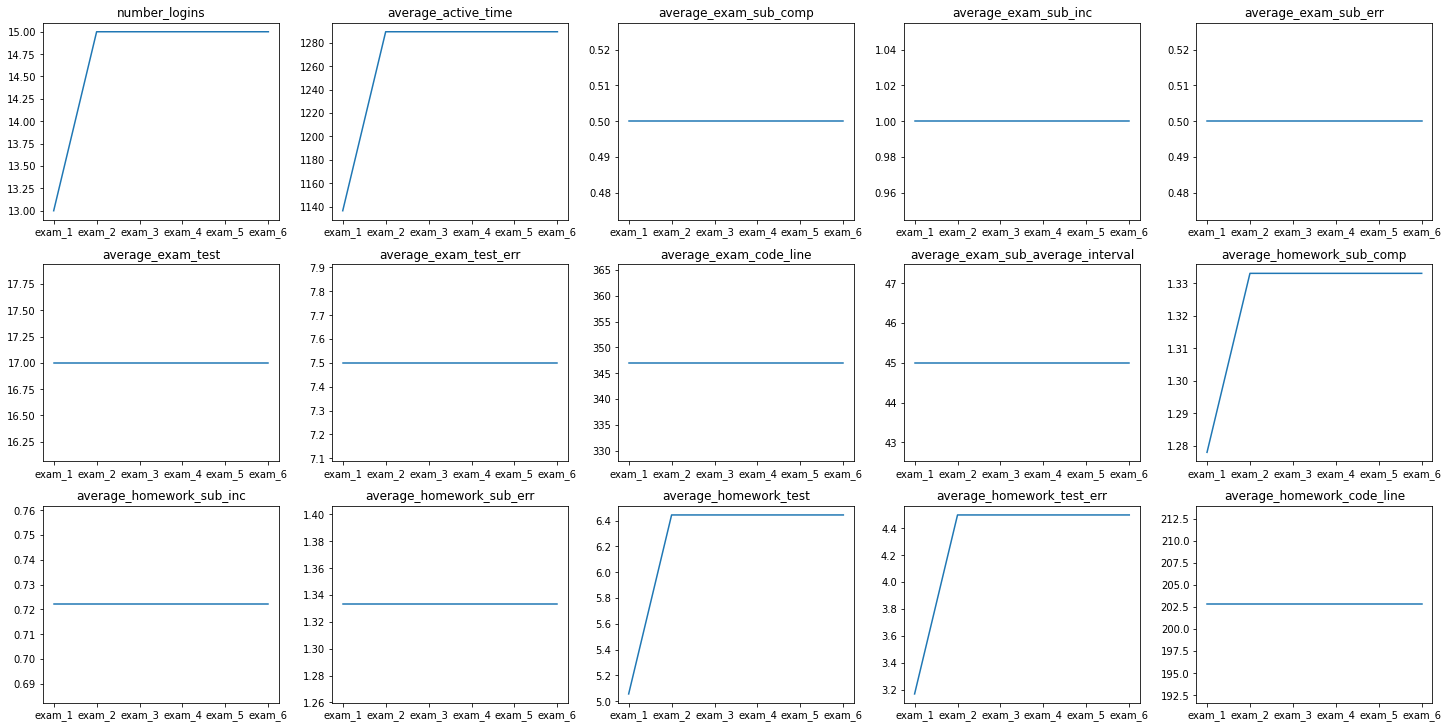

In [ ]:
#@title
plot_features(student_33)

- É possível perceber que o **aluno 33** depois do segundo **exam** não teve mais atividade nas avaliações monitoradas é bem parecido com o aluno 32, começa bem mas para em um determinado tempo, no esperimento o modelo classificou ele com não desistente depois da terceira avaliação, o que foi o inverso do esperado já que foi depois da segunda avaliação que ele deixou de ser ativo

In [ ]:
df_3.iloc[:, 3:].describe()

,number_logins,average_active_time,average_exam_sub_comp,average_exam_sub_inc,average_exam_sub_err,average_exam_test,average_exam_test_err,average_exam_code_line,average_exam_sub_average_interval,average_homework_sub_comp,average_homework_sub_inc,average_homework_sub_err,average_homework_test,average_homework_test_err,average_homework_code_line,average_homework_test_average
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,36.566038,623.730698,0.482792,3.252226,1.292547,10.050038,4.340019,670.769547,196.341660,0.767811,1.61800,0.946547,3.491962,1.617491,383.022377,344.969057
std,18.742701,336.111834,0.525705,3.499167,1.551774,8.550020,5.964536,464.799413,364.330026,0.493521,1.73126,0.917140,3.078565,1.534864,263.570407,468.450667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,477.780000,0.250000,0.636000,0.500000,4.417000,0.917000,347.000000,23.292000,0.583000,0.58800,0.382000,1.912000,0.667000,174.048000,18.713000
50%,37.000000,572.461000,0.455000,2.083000,0.833000,7.917000,2.167000,635.500000,52.355000,0.721000,1.00000,0.691000,3.328000,1.191000,336.794000,176.619000
75%,47.000000,728.138000,0.583000,4.455000,1.455000,15.182000,6.000000,1029.200000,128.566000,0.945000,2.14700,1.324000,4.118000,2.221000,619.132000,390.482000
max,91.000000,1714.060000,3.273000,15.818000,7.400000,40.000000,36.000000,1582.091000,1787.185000,2.985000,8.85400,5.341000,19.091000,8.659000,1138.591000,2197.874000


- É possível perceber que a atividade dele até a 3º prova era baixa, mas não se diferenciava muito da média da turma

### Visualizando os arquivos de nota no **aluno 33**

In [ ]:
!ls /content/codebench/2016-1/102/users/1312/grades/

106.log  18.log  44.log  59.log  75.log  97.log  final_grade.data


- Ele possui os arquivos de nota de 3 **homeworks** válidos (44, 75, 106) e 1 **exam** válido (97).

In [ ]:
!cat /content/codebench/2016-1/102/users/1312/grades/44.log

---- grade (0-10): 10
---- number of exercises: 10
---- correct: 10
---- incorrect: 0
---- blank: 0

- No primeiro exercício válido ele tirou nota máxima ou seja 10

In [ ]:
!cat /content/codebench/2016-1/102/users/1312/grades/75.log

---- grade (0-10): 7.85714
---- number of exercises: 7
---- correct: 6
---- incorrect: 1
---- blank: 0

- No exercício 75 a nota já foi mais baixa

In [ ]:
!cat /content/codebench/2016-1/102/users/1312/grades/97.log

---- grade (0-10): 5
---- number of exercises: 2
---- correct: 1
---- incorrect: 0
---- blank: 1

- Fez apenas 1 questão na primeira prova

In [ ]:
!cat /content/codebench/2016-1/102/users/1312/grades/106.log

---- grade (0-10): 1.11111
---- number of exercises: 9
---- correct: 1
---- incorrect: 0
---- blank: 8

- No exercío depois da prova esse aluno foi bem ruim, fez apenas 1 questão e deixou as outras em branco

## Analisando o **aluno 36**

In [ ]:
#@title
student_36 = show_features_student(36)
student_36

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,15,29,37,47,59,68
average_active_time,273.983,561.102,636.22,721.407,790.305,865.322
average_exam_sub_comp,0,0.091,0.182,0.364,0.455,0.545
average_exam_sub_inc,0.818,2.273,2.273,3.545,3.545,3.636
average_exam_sub_err,0.364,1.091,1.182,2.091,2.182,2.182
average_exam_test,2.455,8.909,10.364,13,14,15.182
average_exam_test_err,1.091,4.545,6,8.182,8.455,8.909
average_exam_code_line,669.818,669.818,669.818,669.818,669.818,669.818
average_exam_sub_average_interval,17.479,91.661,91.661,102.458,125.73,127.821
average_homework_sub_comp,0.542,0.583,0.583,0.688,0.792,1


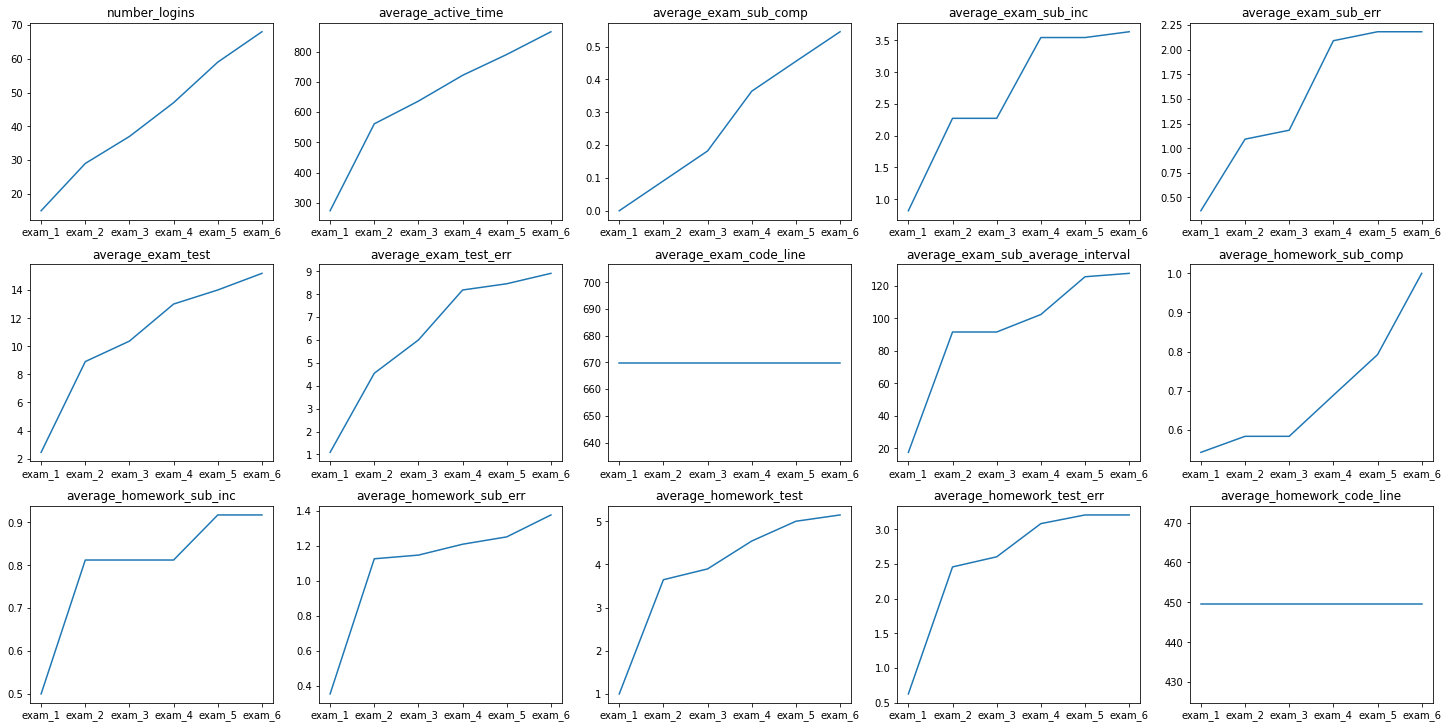

In [ ]:
#@title
plot_features(student_36)

- Este aluno até não fez nenhuma questão na primeira prova, isso deixou a variável **average_exam_sub_comp** zerada, seria essa a causa da classificação errada no experimento 1 usando Gaussian Naive Bayes?

- No geral se comporta bem parecido com a média da turma.

## Analisando o **aluno 41**

In [ ]:
#@title
student_41 = show_features_student(41)
student_41

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,17,33,41,63,73,82
average_active_time,217.475,534.763,728.138,955.087,1102.91,1165.35
average_exam_sub_comp,0.083,0.167,0.333,0.5,0.583,0.583
average_exam_sub_inc,5.917,12.25,12.583,12.583,13.167,14
average_exam_sub_err,1.083,2.583,2.667,2.667,3.25,3.667
average_exam_test,2.5,7.75,9.917,10.167,11.833,14.917
average_exam_test_err,1.333,2.833,3.083,3.083,4.333,6.333
average_exam_code_line,1506.08,1506.08,1506.08,1506.08,1506.08,1506.08
average_exam_sub_average_interval,6.755,20.113,37.988,37.988,48.176,65.072
average_homework_sub_comp,2.456,2.809,2.985,3.956,4.206,4.412


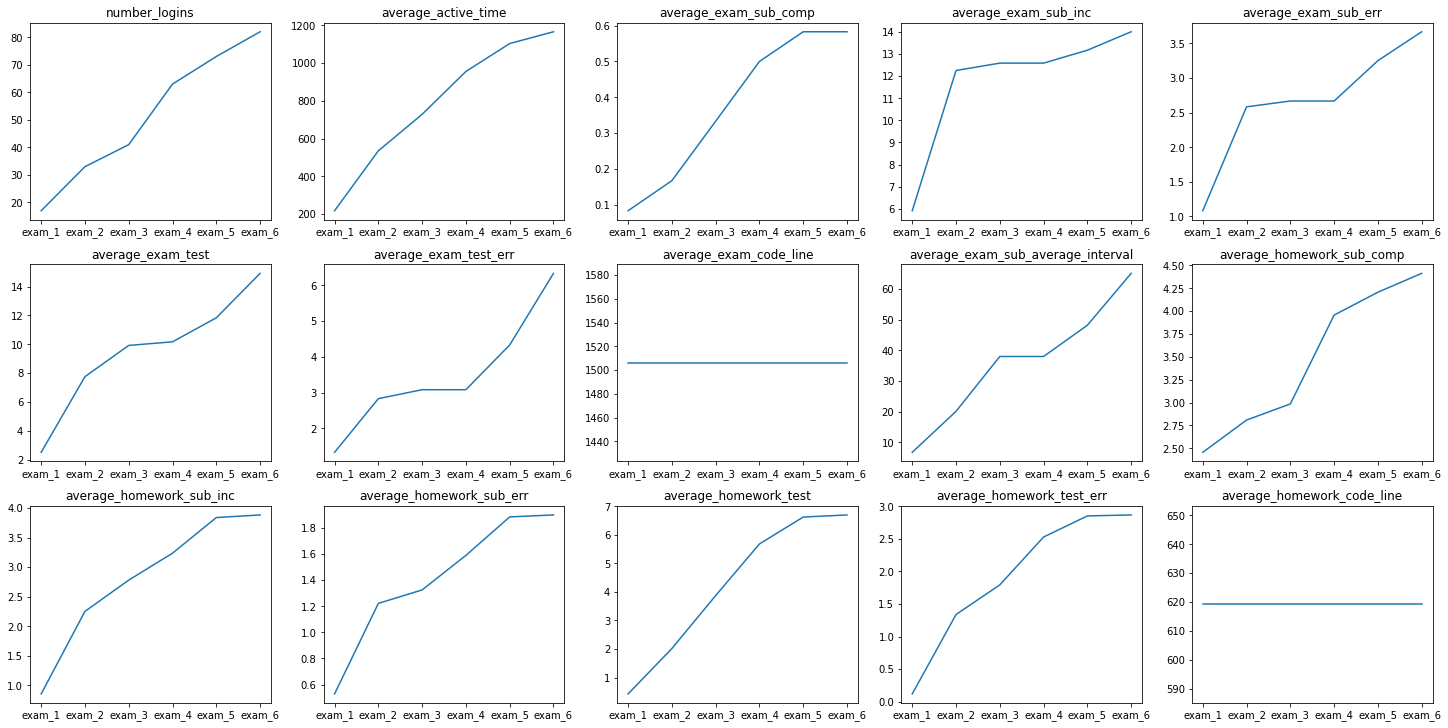

In [ ]:
#@title
plot_features(student_41)

- Este aluno foi classificado de forma incorreta usando dados até a primeira prova, porque isso aconteceu???

- Seria porque ele teve uma taxa de acertos na prova extremamente baixa como mostra a feature **average_exam_sub_comp**??

## Analisando mais detalhadamente o **aluno 44**

In [ ]:
#@title
student_44 = show_features_student(44)
student_44

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,21,25,26,26,26,26
average_active_time,967.2,967.2,967.2,967.2,967.2,967.2
average_exam_sub_comp,0.5,0.5,0.5,0.5,0.5,0.5
average_exam_sub_inc,0.5,0.5,0.5,0.5,0.5,0.5
average_exam_sub_err,0.5,0.5,0.5,0.5,0.5,0.5
average_exam_test,14,14,14,14,14,14
average_exam_test_err,2.5,2.5,2.5,2.5,2.5,2.5
average_exam_code_line,192,192,192,192,192,192
average_exam_sub_average_interval,221,221,221,221,221,221
average_homework_sub_comp,1,1,1,1,1,1


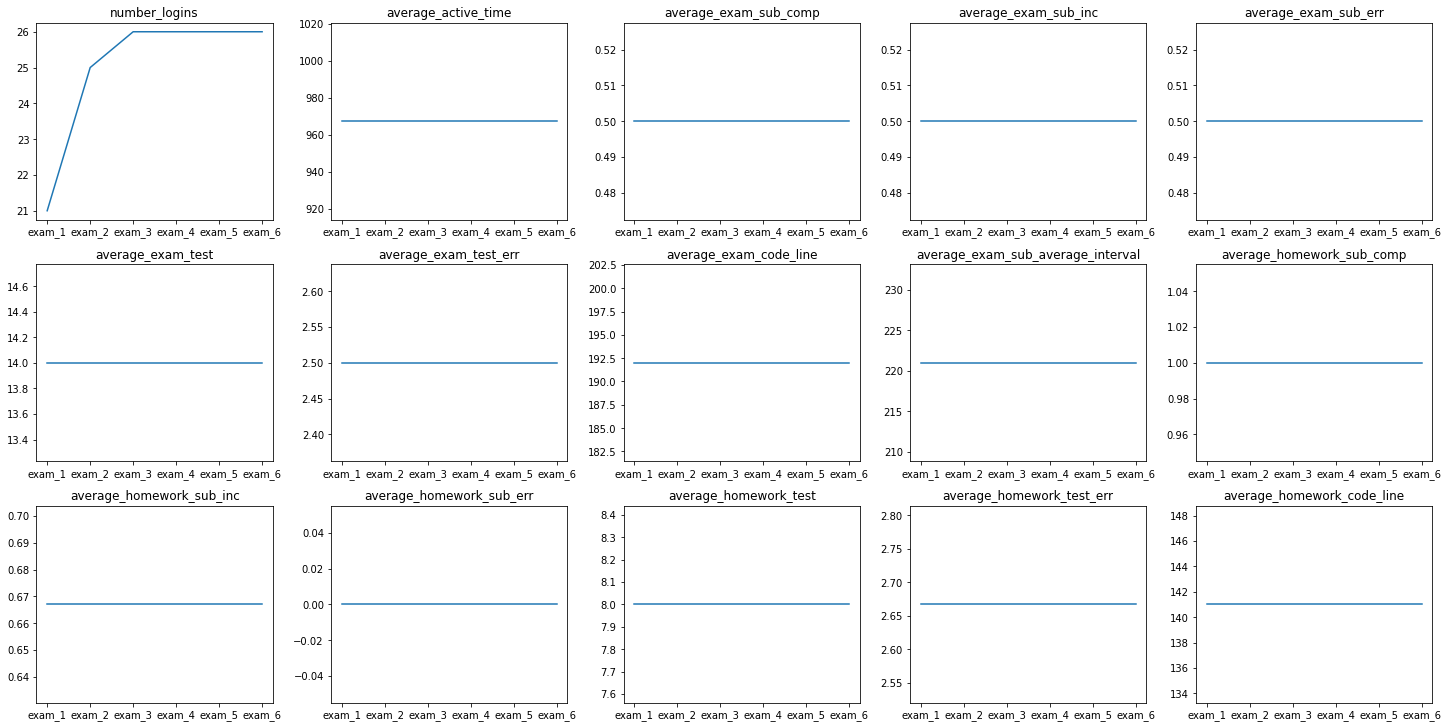

In [ ]:
#@title
plot_features(student_44)

- O ponto que mais chama a atenção é que depois da 2º avaliação este aluno não tem mais atividade na plataforma.

- Aconteceu o mesmo problema do **aluno 33**. Um aluno **Desistente** que não atividade mais atividade na plataforma depois da 2º prova é classificado com **Não Desistente** pelo modelo a partir da **3º prova**.

- Outro ponto em comum com o **aluno 33** é que o número de logins aumenta, não significativamente, mas é a única **feature** com essa característica depois da 1º prova.

## Analisando mais detalhadamente o **aluno 50**

In [ ]:
#@title
student_50 = show_features_student(50)
student_50

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,33,72,76,97,98,98
average_active_time,773.12,1712.52,1714.06,2099.32,2099.32,2099.32
average_exam_sub_comp,0.167,0.333,0.333,0.333,0.333,0.333
average_exam_sub_inc,5.667,9.167,9.167,9.5,9.5,9.5
average_exam_sub_err,2,2.667,2.667,2.833,2.833,2.833
average_exam_test,20.167,28.5,28.5,35,35,35
average_exam_test_err,3.833,5.667,5.667,10.833,10.833,10.833
average_exam_code_line,1178,1178,1178,1178,1178,1178
average_exam_sub_average_interval,14.197,30.514,30.514,32.681,32.681,32.681
average_homework_sub_comp,0.386,0.591,0.591,0.909,0.909,0.909


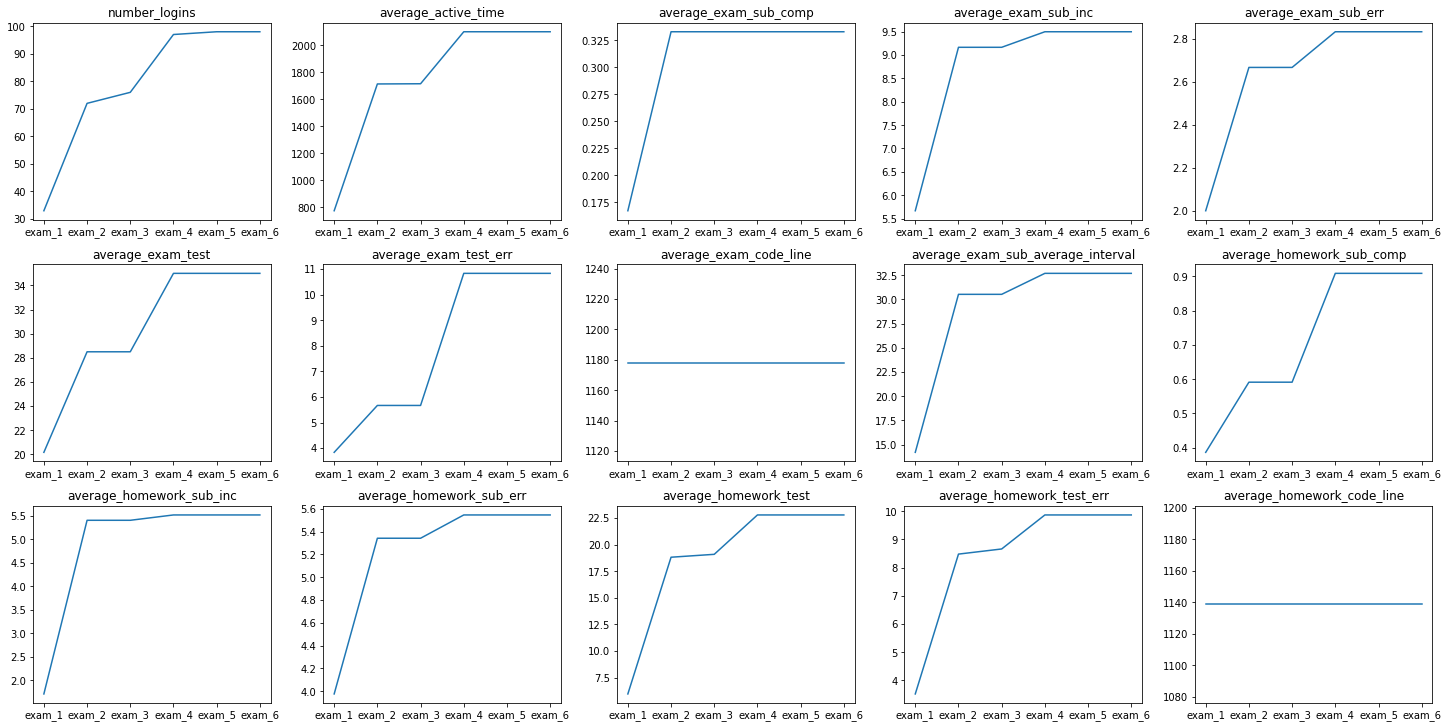

In [ ]:
#@title
plot_features(student_50)

- Primeiro ponto a se observar é que o **aluno 50** a partir da 4 prova suas atividades param, não continuam, será que ele não fez a últimas provas?

- Todas as avaliações feitas pelo usuário

In [ ]:
!ls /content/codebench/2016-1/102/users/1705/grades

106.log  136.log  173.log  44.log  75.log  final_grade.data
126.log  158.log  18.log   59.log  97.log


- Visualizando as notas das provas

In [ ]:
!cat /content/codebench/2016-1/102/users/1705/grades/97.log

---- grade (0-10): 5
---- number of exercises: 2
---- correct: 1
---- incorrect: 1
---- blank: 0

In [ ]:
!cat /content/codebench/2016-1/102/users/1705/grades/126.log

---- grade (0-10): 8.35
---- number of exercises: 2
---- correct: 2
---- incorrect: 0
---- blank: 0

**- Ele não fez a terceira prova**

In [ ]:
!cat /content/codebench/2016-1/102/users/1705/grades/173.log

---- grade (0-10): 0
---- number of exercises: 2
---- correct: 0
---- incorrect: 1
---- blank: 1

**- Ele não fez a quinta prova**

**- Ele não fez a sexta prova**

- Entre o exame_2 e exam_3 os valores das features não tiveram alteração significativa

- Aumenta os valores entre o exam_3 e o exam_4 e depois não tem alterção

- Um outro ponto a se destacar é que a média de códigos escritos para avaliações do tipo **exam** se mantém constante em **1178** e a de avaliações do tipo **homework** em **1138.59**

## Analisando o **aluno 51**

In [ ]:
#@title
student_51 = show_features_student(51)
student_51

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,7,15,17,19,19,19
average_active_time,658.5,1375.43,1514.5,1514.5,1514.5,1514.5
average_exam_sub_comp,0,0.2,0.2,0.2,0.2,0.2
average_exam_sub_inc,0,0.4,0.4,0.4,0.4,0.4
average_exam_sub_err,1.2,5,5,5,5,5
average_exam_test,13.8,35.8,40,40,40,40
average_exam_test_err,10.6,31.8,36,36,36,36
average_exam_code_line,1029.2,1029.2,1029.2,1029.2,1029.2,1029.2
average_exam_sub_average_interval,28.36,870.62,870.62,870.62,870.62,870.62
average_homework_sub_comp,0.778,1.444,1.444,1.444,1.444,1.444


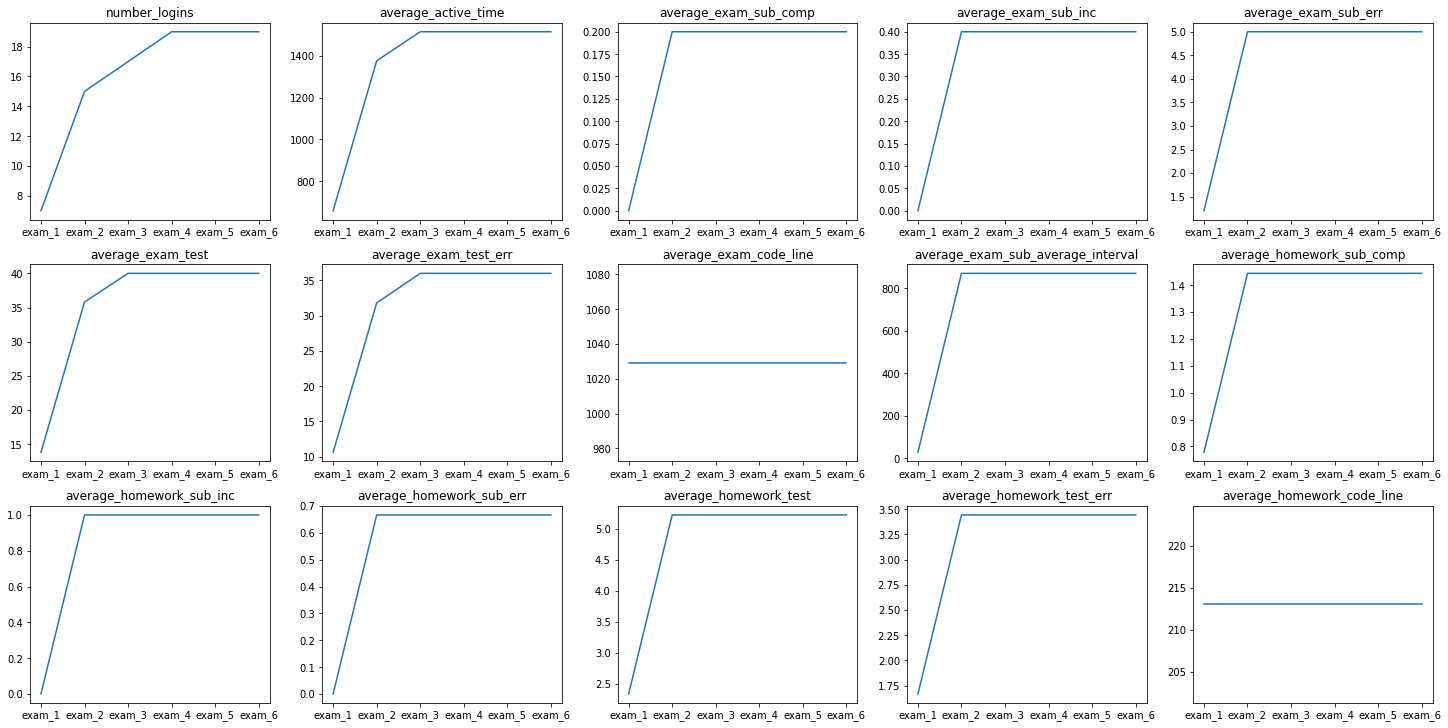

In [ ]:
#@title
plot_features(student_51)

##### Visualizando as notas do aluno

In [ ]:
!cat /content/codebench/2016-1/102/users/1718/grades/*

---- grade (0-10): 3.33333
---- number of exercises: 9
---- correct: 3
---- incorrect: 0
---- blank: 6---- grade (0-10): 5
---- number of exercises: 2
---- correct: 1
---- incorrect: 0
---- blank: 1---- grade (0-10): 0
---- number of exercises: 2
---- correct: 0
---- incorrect: 0
---- blank: 2---- grade (0-10): 2.85714
---- number of exercises: 7
---- correct: 2
---- incorrect: 1
---- blank: 4---- grade (0-10): 7.14286
---- number of exercises: 7
---- correct: 5
---- incorrect: 0
---- blank: 2---- grade (0-10): 0
---- number of exercises: 2
---- correct: 0
---- incorrect: 1
---- blank: 10.48

- Ao verficar a nota do aluno identifica-se que a sua maioria é bem baixa, chegando a ser zero em duas provas, e a sua média final sendo **0.48** levando em consideração as notas este aluno foi reprovado.

- O aluno não apresenta nenhuma interação nas avaliações monitoradas a partir da 3º avaliação.

## Analisando alunos aletórios que não apresentaram váriações na predição

### **Aluno 40**

In [ ]:
#@title
student_40 = show_features_student(40)
student_40

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,23,46,52,67,79,91
average_active_time,210.363,370.062,465.875,592.975,649.85,758.6
average_exam_sub_comp,0.083,0.25,0.25,0.417,0.417,0.417
average_exam_sub_inc,1.583,1.917,1.917,4.333,4.333,4.333
average_exam_sub_err,0.5,0.5,0.5,1.333,1.583,1.583
average_exam_test,6.333,8.5,10.083,24.083,28.5,29.333
average_exam_test_err,1.75,3.083,4.667,11.833,16.25,17.083
average_exam_code_line,811.833,811.833,811.833,811.833,811.833,811.833
average_exam_sub_average_interval,7.176,9.405,9.405,53.47,130.22,130.22
average_homework_sub_comp,0.338,0.544,0.721,0.897,1.044,1.221


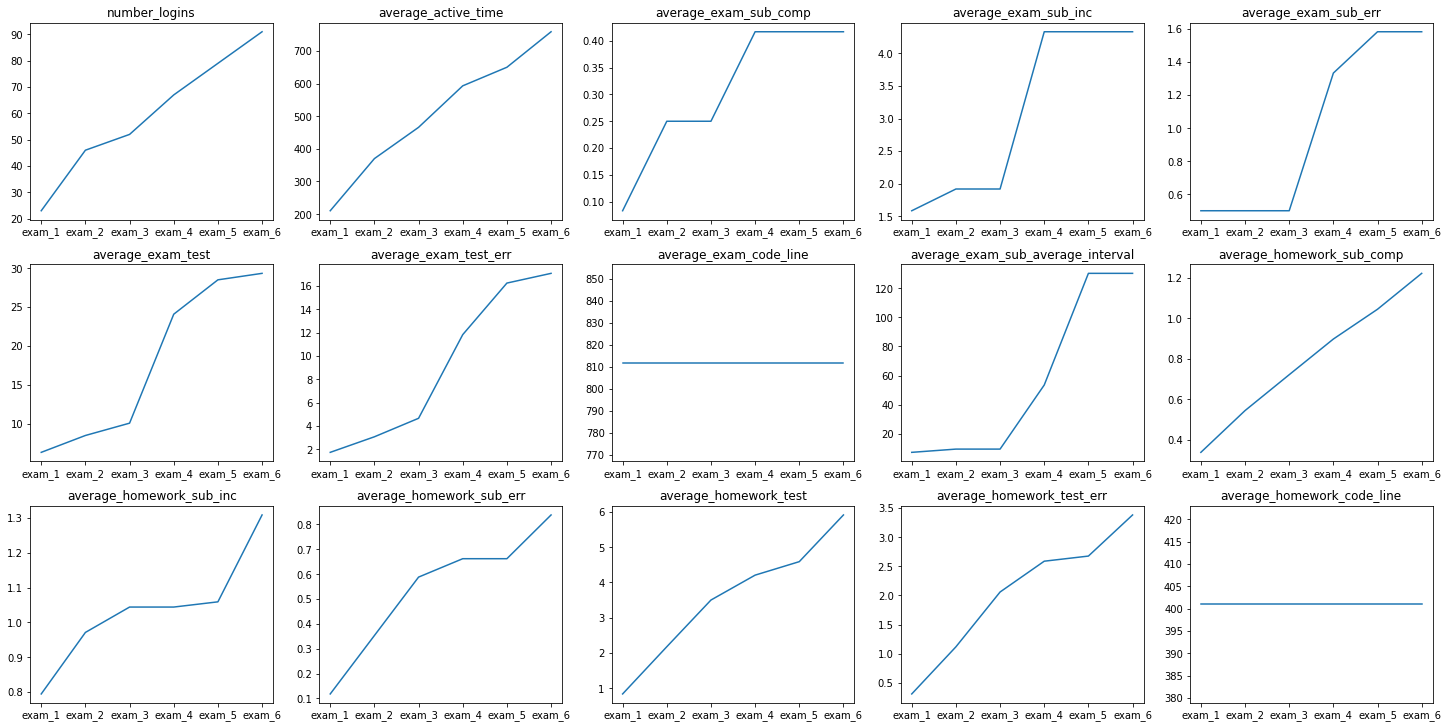

In [ ]:
#@title
plot_features(student_40)

- A média de linha de códigos para avaliações do tipo **exam** se mantém constante.

- A média de linas de códigos para avaliações do tipo **homework** também se mantém constante.

### **Aluno 48**

In [ ]:
#@title
student_48 = show_features_student(48)
student_48

,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6
number_logins,9,26,30,32,41,48
average_active_time,538.25,538.25,538.25,538.25,538.25,575
average_exam_sub_comp,0,0,0,0,0,0
average_exam_sub_inc,0,0,0,0,0,0
average_exam_sub_err,0,0,0,0,0,0
average_exam_test,0,0,0,0,0,0
average_exam_test_err,0,0,0,0,0,0
average_exam_code_line,0,0,0,0,0,0
average_exam_sub_average_interval,0,0,0,0,0,0
average_homework_sub_comp,0,0,0,0,0,0


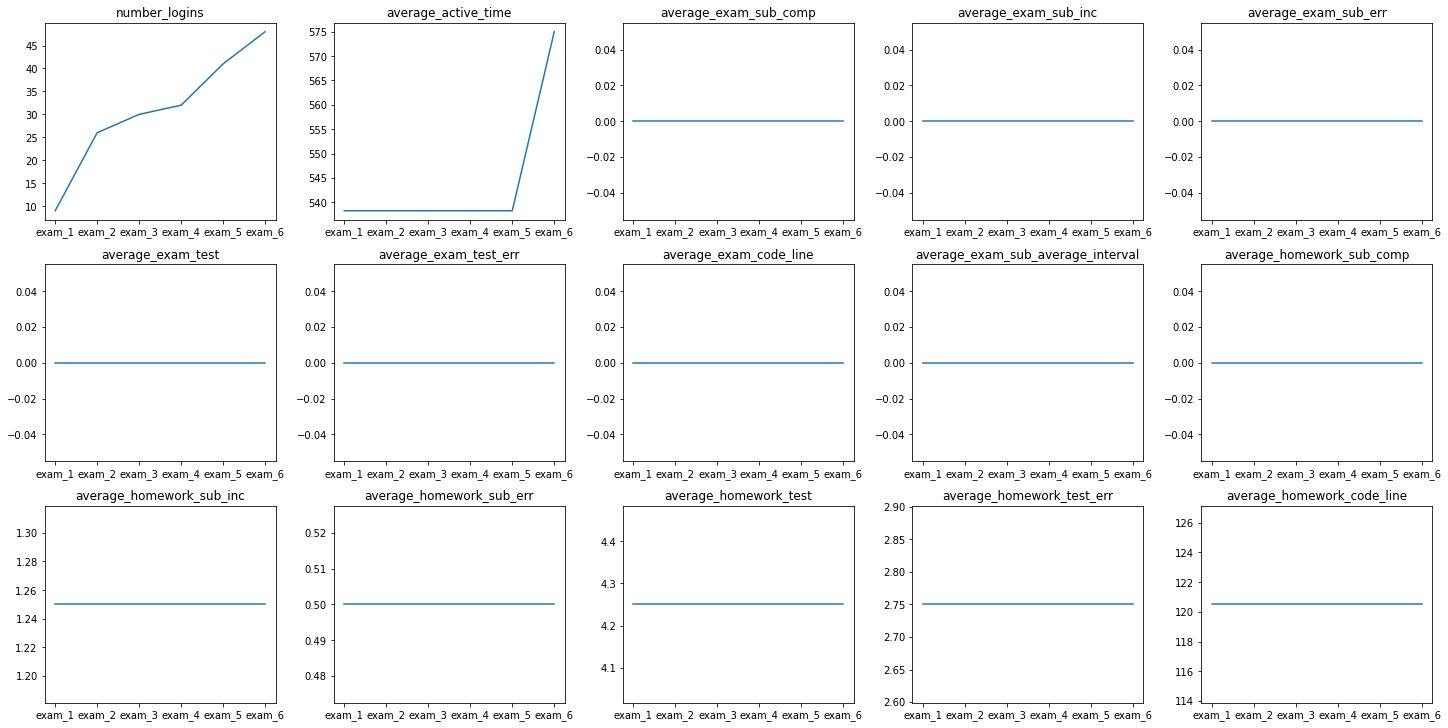

In [ ]:
#@title
plot_features(student_48)

- É possível obsevar que o aluno 48 só fez as avaliações monitoradas até a primeira prova.

- Também nota-se que tal aluno continuou a entrar na plataforma, talvez tenha tantado fazer outras avaliações diferentes daquelas monitoradas dentro da janela de tempo.

- Os gráficos demonstram uma certa similaridade com o **aluno 44**, pois se mantém constantes em relação a média da primeira prova e também com o **aluno 33**.

- Um ponto que se destaca é que muitos valores de features estão zerados, indicando que o aluno não teve atividade nas avaliações monitoradas.

## Conclusão

- Nos modelos derivados de árvore de decisão, há um erro maior quando o usuário começa a fazer as tarefas e provas bem no inicio, mas depois param de fazer as provas e tarefas


- Já no modelo de probabilidade há um também um maior erro quando o usuário começa bem e depois de um tempo ele não tem mais atividade. os alunos 51 e 36 no experimento 1 usando GNB apresentaram baixa taxa ou nenhuma de acertos em provas